### 결정트리

#### 결정트리 Graphviz

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
dt_clf = DecisionTreeClassifier(random_state=156)

In [3]:
iris_data = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=156, splitter='best')

사이컷런의 결정 트리 알고리즘을 구현한 DecisionTreeClassifer를 제공해 결정 트리 모델의 학습과 예측을 수행할 수 있습니다.

In [4]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot',class_names=iris_data.target_names,feature_names = iris_data.feature_names,impurity=True, filled=True)

In [5]:
import graphviz

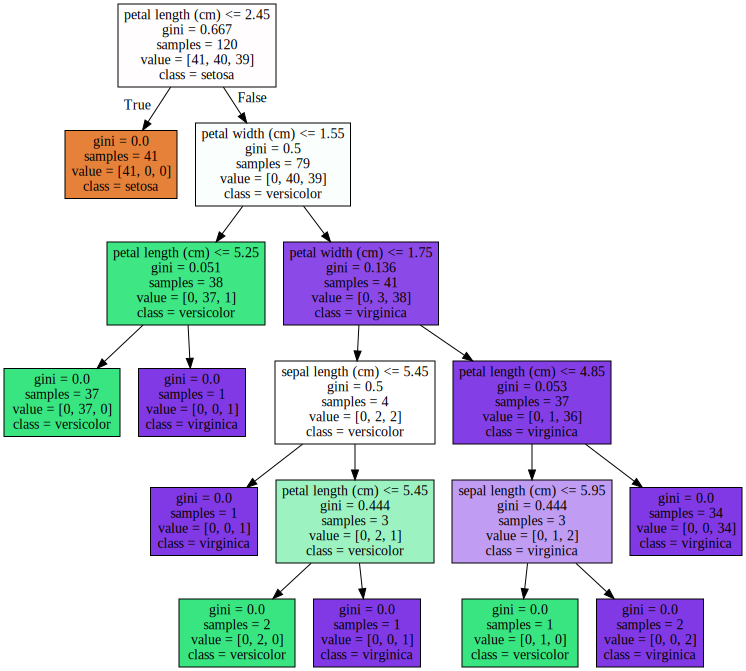

In [6]:
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

* petal length <= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건으로,  
없으면 리프노드 입니다.    
* gini : value = []로 주어진 데이터 분포에서의 지니 계수입니다.  
* samples : 현 규칙에 해당하는 데이터 건수입니다.  
* value = [ ]는 클래스 값 기반의 데이터 건수입니다. 붓꽃 데이터 세트는 클래스 값으로 0,1,2를 가지며  
0 : setosa, 1 : versicolor, 2 : virginica으로, 만일 value = [ 41, 40, 39 ]라면 클래스 값의 순서로   
각각 데이터가 41개, 40개, 39개로 구성되있는 것을 의미합니다.

* setosa, versicolor, virginica는 각각 주황색, 초록색, 보라색을 나타내며, 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미입니다. 

* Graphviz를 이용한 결정 트리 알고리즘 규칙 생성 트리를 시각적으로 살펴보면 4번 노드에서 virginica가 1개가 존재해 완벽하기 구분하기 위해서 트리 노드를 계속해서 만들어가는데 이로 인해 매우 복잡한 규칙 트리가 만들어질 수 있으며 모델이 쉽게 과적합되는 문제가 발생할 수 있습니다.  
때문에 결정 트리 알고리즘에서 복잡한 트리가 생성되는 것을 막기 위해 하이퍼 파라미터를 사용 합니다.

하이퍼 파라미터
 - max_depth : 결정 트리의 최대 트리 깊이를 제어
 - min_samples_split : 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 갯수
 - min_samples_leaf : 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값을 지정.

Feature importances:
{0} [0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

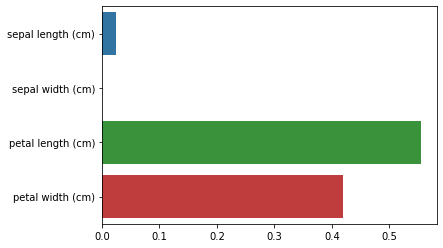

In [7]:
import seaborn as sns
import numpy as np
%matplotlib inline

print('Feature importances:\n{0}',format(np.round(dt_clf.feature_importances_,3)))
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는데 있어 피처의 중요한 역할 지표를 DecisionTreeClassifier 객체의 feature_importances_ 속성으로 제공하며, 이는 ndarray 형태로 값을 반환하며 피처 순서대로 값이 할당됩니다.  
값이 높을수록 해당 피처의 중요도가 높다는 의미입니다.

#### 결정 트리 과적합

In [8]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

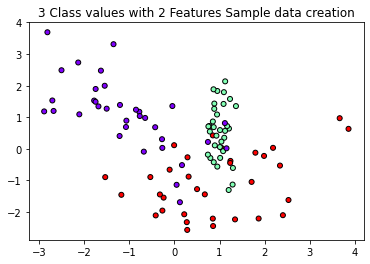

In [9]:
plt.title("3 Class values with 2 Features Sample data creation")

X_features, y_labels = make_classification(n_features=2,n_redundant=0,n_informative=2,
                                          n_classes=3,n_clusters_per_class=1, random_state=0 )

plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

사이킷런은 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 make_classification( ) 함수를 제공합니다.  
함수를 이용해 2개의 피처가 가지 유형의 클래스 값을 가지는 데이터 세트를 만들고 이를 그래프 형태로 시각화했습니다.

In [10]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

해당 함수는 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타내 모델이 어떻게 데이터 세트를 예측 분류하는지 보여줍니다.

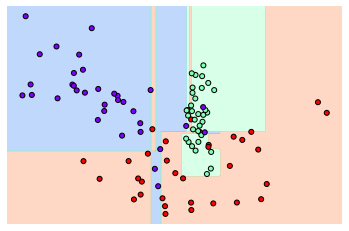

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier().fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

결정 트리의 기본 하이퍼 파라미터 설정은 리프 노드 안에 데이터가 모두 균일하거나 하나만 존재해야 하는 분할 기준으로 인해 결정 기준 경계가 많아져 복잡해졌으며, 이로 인해 예측 정확도가 떨어지게 됩니다.

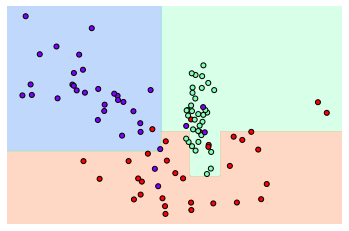

In [12]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=5).fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

min_samples_leaf = 6을 설정해 6개 이하의 데이터는 리프 노드를 생성할 수 있도록 리프 노드 생성 규칙을 완화한 결과, 이상치에 크게 반응하지 않으면서 일반화된 분류 규칙에 따라 분류됐음을 알 수 있습니다.

#### 앙상블 
여러 명의 전문가로 위원회를 구성해 다양한 의견을 수렴하여 결정하듯이 앙상블 학습의 목표는 다양한 분류기의 예측 결과를 결합함으로써 신뢰성이 높은 예측값을 얻는 것입니다.

##### 보팅


In [13]:
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

cancer = load_breast_cancer()

data_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


사이킷런의 내장 데이터 세트 위스콘신 유방암 데이터 세트를 불러와 데이터프레임으로 변환했습니다.

In [14]:
lf_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()

vo_clf = VotingClassifier(estimators=[('lf',lf_clf),('knn',knn_clf)],voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_test)
print('voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

classifiers = [ lf_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name,accuracy_score(y_test,pred)))

voting 분류기 정확도 : 0.9561
LogisticRegression 정확도 : 0.9474
KNeighborsClassifier 정확도 : 0.9035


사이킷런은 VotingClassifier 클래스를 이용해 보팅 분류기를 생성할 수 있으며, 로지스틱 회귀와 KNN을 기반으로하여 소프트 보팅 방식으로 새롭게 보팅 분류기를 만들었습니다.  

VotingClassifier 클래스 주요 인자  
* estimators = 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력 받습니다.
* voting = 하드 보팅은 'hard', 소프트 보팅에는 'soft'를 입력받으며, 하드 소프트보팅이 정확도가 높습니다.

##### 배깅 
배깅은 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘으로 대표적인 알고리즘이 랜덤포레스트이며, 랜덤 포레스트는 결정 트리 기반으로 결정트리의 쉽고 직관적인장점을 그대로 가지고 있습니다.

###### 랜덤 포레스트
랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 합니다.

In [15]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

원본 데이터에 중복된 Feature 명으로 인해 duplicate name에러가 발생하여 중복 feature명에 대해 원본 feature명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df( ) 생성했습니다.

In [16]:
import pandas as pd

def get_human_dataset( ):
    
    feature_name_df = pd.read_csv('features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    X_train = pd.read_csv('X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('X_test.txt',sep='\s+', names=feature_name)
    
    y_train = pd.read_csv('y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('y_test.txt',sep='\s+',header=None,names=['action'])
    
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용하였고,  
학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여하여  
로드된 학습/테스트용 데이터프레임을 모두 반환하였습니다.



In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9108


결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환하여 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가해보았습니다.

In [18]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9166


GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터를 튜닝해보았습니다. 데이터 세트는 사용자 행동 데이터 세트를 이용했습니다.

In [19]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


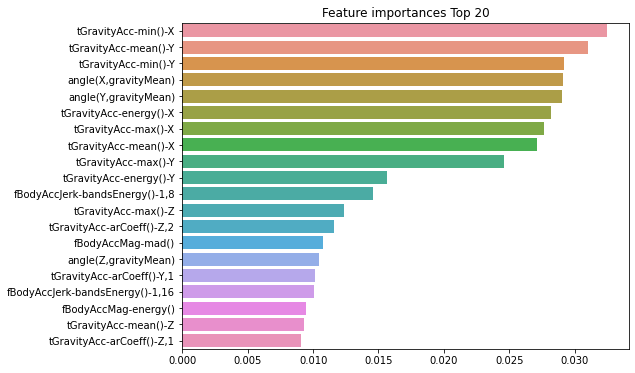

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

#### Boosting Machine
여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식입니다.

##### GBM ( gradient Boost Machine )
오류 데이터에 가중치를 부여하는 방식이며, 가중치 업데이트를 경사 하강법을 이용합니다.  
( 실제 값 - 예측 값을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하는 것이 경사 하강법. )

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings 
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
pred = gb_clf.predict(X_test)
print("GBM 정확도: {0:.4f}".format(accuracy_score(y_test,pred)))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))


GBM 정확도: 0.9386
GBM 수행 시간: 126.7 초 


기본 하이퍼 파라미터만으로 랜덤 포레스트보다 나은 예측 성능을 나타냈습니다. 일반적으로 GBM이 랜덤 포레스트보다 예측 성능이 우수하지만 수행 시간이 오래 걸리며, 하이퍼 파라미터 튜닝 노력도 더 필요하는 점이 단점입니다.

In [22]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 12.9min finished


최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 500}
최고 예측 정확도: 0.9014


하이퍼 파라미터
* learning_rate : GBM이 학습을 진행할 때마다 적용하는 학습률, 0~1 사이의 값을 지정하며 기본값은 0.1  
너무 작은 값을 적용할 시 성능은 높아지지만 수행 시간이 오래 걸리는 단점이 존재
* n_estimators : weak learner의 개수, 기본값은 100, 순차적으로 오류를 보정하므로 개수가 많을수록 예측 성능이 좋아지지만 수행시간이 오래걸리는 단점 존재
* subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율


하이퍼 파라미터를 설정한 결과 최적 하이퍼 파라미터와 최고 예측 정확도가 나왔지만, PC에서 30분정도의 시간이 걸렸습니다.

In [23]:
gd_pred = grid_cv.best_estimator_.predict(X_test)
print('GBM 정확도 : {0:.4f}'.format(accuracy_score(y_test,gd_pred)))

GBM 정확도 : 0.9396


테스트 데이터 세트에서 약 94.1%의 정확도가 나왔습니다.  
GBM은 뛰어난 예측 성능을 가졌지만 수행 시간이 오래 걸린다는 단점이 있습니다.

#### XGBoost
GBM에 기반하고 있으며, GBM의 단점이였던 느린 수행 시간 및 과적합 규제 부재등의 문제를 해결해서 다른 머신러닝 기법보다 뒤어난 예측 성능을 나타냅니다.

XGBoost 장점
* 뛰어난 예측 성능
* 결손값 자체 처리 
* 과적합 규제
* 빠른 수행 시간  
: 순차적으로 Weak learner가 가중치를 증감하는 방식의 GBM과 달리 병렬수행으로 빠른 수행 성능 보장
* 나무 가지치기  
: max_depth 파라미터로 분할 깊이를 조정하지만 나무 가지치기로 분할 수를 줄임
* 자체 내장된 교차 검증  
: 학습, 평가 데이터세트에 대한 교차 검증으로 최적화된 반복 수행 횟수를 가지며,   
  최적화되면 조기 중단되는 기능이 있습니다.


파이썬 래퍼 XGBoost 적용 – 위스콘신 Breast Cancer 데이터 셋


In [84]:
import xgboost as xgb
from xgboost import plot_importance

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [85]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


타깃 레이블 값의 종류는 악성( 0 )이 212개, 양성(1)이 357개로 구성되어있습니다.

In [86]:
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )
print(X_train.shape , X_test.shape)


(455, 30) (114, 30)


전체 데이터 세트중 80%를 학습용, 20%를 테스트용으로 분할하였습니다.

In [116]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

XGBoost는 사이킷런과 다르게 학습용,테스트용 데이터 세트를 위한 객체로 DMatrix를 생성합니다.  
인자는 data( 피처 데이터 세트 ), label( 레이블 데이터 세트 )이며 회귀는 숫자형인 종속값 데이터 세트입니다.  


In [117]:
params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'binary:logistic',
           'eval_metric':'logloss',
           'early_stoppings':100
        }
num_rounds = 400

XGBoost 하이퍼 파라미터
* max_depth : 트리 최대 깊이
* eta : 학습률
* logloss : 오류 함수의 평가 성능 지표 
* num_rounds : 부스팅 반복 횟수
* 최소 반복 횟수 : 400 (조기 중단)
* objective(목적함수)는 예제 데이터가 0 또는 1 이진 분류이므로 이진 로지스틱

In [118]:
wlist = [(dtrain,'train'),(dtest,'eval') ]
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds , evals=wlist )

[0]	train-logloss:0.609685	eval-logloss:0.61352
[1]	train-logloss:0.540804	eval-logloss:0.547842
[2]	train-logloss:0.483755	eval-logloss:0.494247
[3]	train-logloss:0.434455	eval-logloss:0.447986
[4]	train-logloss:0.390549	eval-logloss:0.409109
[5]	train-logloss:0.354145	eval-logloss:0.374977
[6]	train-logloss:0.321222	eval-logloss:0.345714
[7]	train-logloss:0.292592	eval-logloss:0.320529
[8]	train-logloss:0.267467	eval-logloss:0.29721
[9]	train-logloss:0.245152	eval-logloss:0.277991
[10]	train-logloss:0.225694	eval-logloss:0.260302
[11]	train-logloss:0.207937	eval-logloss:0.246037
[12]	train-logloss:0.192183	eval-logloss:0.231556
[13]	train-logloss:0.177917	eval-logloss:0.22005
[14]	train-logloss:0.165221	eval-logloss:0.208572
[15]	train-logloss:0.153622	eval-logloss:0.199993
[16]	train-logloss:0.14333	eval-logloss:0.190118
[17]	train-logloss:0.133985	eval-logloss:0.181818
[18]	train-logloss:0.125599	eval-logloss:0.174729
[19]	train-logloss:0.117286	eval-logloss:0.167657
[20]	train-log

train( )으로 학습을 수행하면 train_error와 eval_logloss가 지속적으로 감소합니다.

In [122]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.95  0.003 0.9   0.086 0.993 1.    1.    0.999 0.998 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score


def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)

    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)

    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [126]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

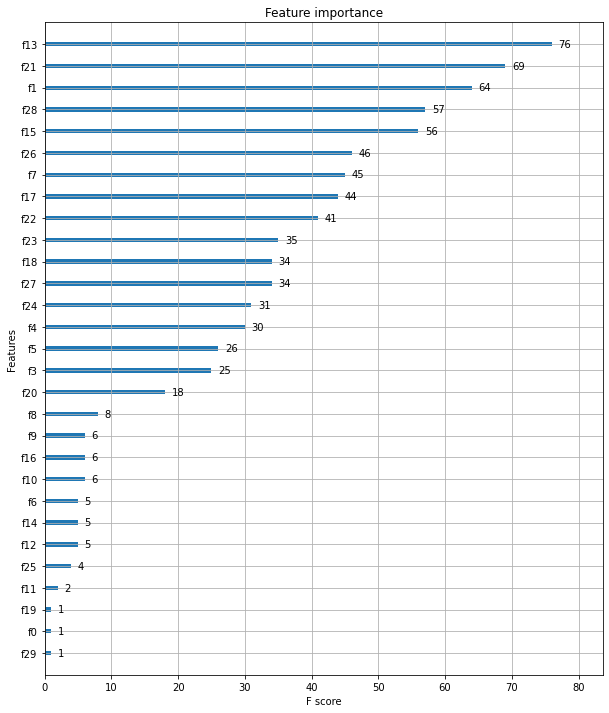

In [102]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

사이킷런 래퍼 XGBoost 적용 – 위스콘신 Breast Cancer 데이터 셋


사이킷런 래퍼 XGBoost 하이퍼 파라미터
* eta -> learning_rate
* sub_sample -> subsample
* lambda -> reg_lambda
* alpha -> reg_alpha
* num_rounds -> n_estimator

In [103]:
from xgboost import XGBClassifier

evals = [(X_test, y_test)]

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train , y_train,  early_stopping_rounds=100,eval_set=evals, eval_metric="logloss",  verbose=True)

w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

211번 반복시 logloss가 0.085593이고 311번 반복 시 logloss가 0.085948인데, early_stopping_rounds=100으로 지정된 100번의 반복 동안 성능 평가 지수가 향상되지 않았기 때문에 더 이상 반복하지 않고 멈춘것입니다.

In [104]:
get_clf_eval(y_test , w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


In [36]:
xgb_wrapper.fit(X_train , y_train,  early_stopping_rounds=10,eval_set=evals, eval_metric="logloss",  verbose=True)

w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


In [37]:
get_clf_eval(y_test , w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9947


early_stopping_rounds을 급격하게 줄이면 예측 성능이 저하될 우려가 큽니다. 왜냐하면 충분한 학습이 되지 않기 때문에 예측 성능이 나빠질 수 있습니다.

#### LightGBM
대부분 트리 기반 알고리즘은 트리의 깊이를 효과적으로 줄이기 위한 균형 트리 분할( level wise )방식 사용.  
LightGBM은 균형보단 최대손실 값을 가진 리프 노드를 지속적으로 분할하는 리프중심 트리분할 방식 사용.  
그렇기 때문에 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성됩니다.

LightGBM 장점
* XGBoost보다 더빠른 학습시간과 예측 수행 시간
* XGBoost보다 더 작은 메모리 사용량
* 카테고리형 피처의 자동 변환과 최적 분할( 원-핫 인코딩등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 노드 분할 수행)  
  
LightGBM 단점
* 10,000건 이하의 데이터 세트에서 적용할 경우 과적합이 발생

In [48]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
feature = dataset.data
target = dataset.target

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2,random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]

lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss',eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865
[14]	valid_0's binary_logloss: 0.215076
[15]	valid_0's binary_logloss: 0.205996
[16]	valid_0's binary_logloss: 0.196091
[17]	valid_0's binary_logloss: 0.186395
[18]	valid_0's binary_logloss: 0.17942
[19]	valid_0's binary_logloss: 0.174727
[20]	valid_0's binary_logloss: 0.168563
[21]	valid_0's binary_logloss: 0.165432
[22]	valid_0's binary_logloss: 0.160356
[23]	valid_0's binary_logloss: 0.155508
[24]	valid_0's binary_logloss: 

조기중단으로 인해 147번 반복까지만 수행하고 학습을 종료했습니다.

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [50]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[33  4]
 [ 2 75]]
정확도: 0.9474, 정밀도: 0.9494, 재현율: 0.9740,    F1: 0.9615, AUC:0.9926


In [54]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

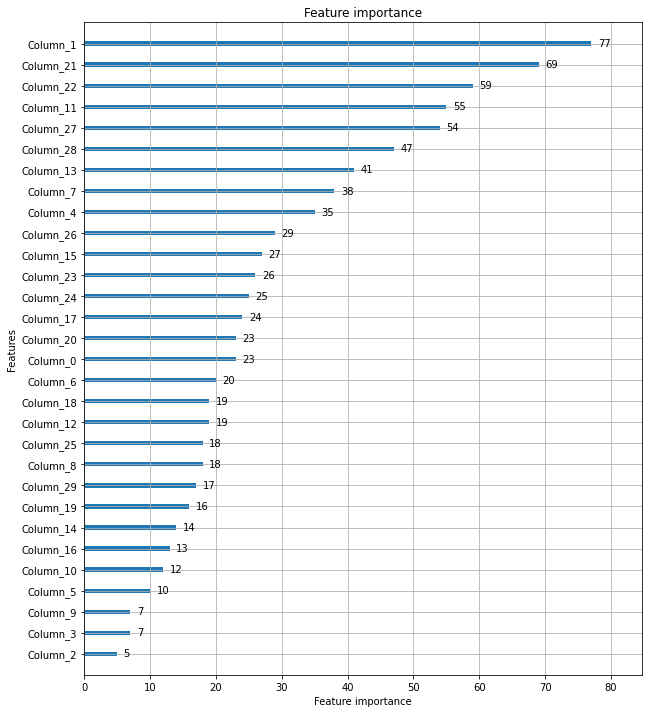

In [55]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)